In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2015-11-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ['SPY','AMT','ORCL','PPG','COST','MSFT','UNH','TROW','BLK','NVDA','FB','BABA','CRM','PFE','NFLX','SQ']

# Get 5 years of past data of portfolios
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.index = df_ticker.index.date
df_ticker.head()
df_ticker.to_csv('df_ticker.csv') 

In [5]:
# Documentation of Monte Carlo Simulation
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [6]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.40,0.04,0.04,0.04],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [7]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AMT                                                  BABA  \
              open    high    low   close     volume daily_return   open   
2015-11-19   99.87  100.26  99.22   99.62  1223026.0          NaN  78.06   
2015-11-20  100.20  100.87  99.53  100.47  1023837.0     0.008532  78.44   
2015-11-23  100.49  100.67  99.45   99.93   755145.0    -0.005375  80.45   
2015-11-24   99.28   99.45  98.32   99.27  1054663.0    -0.006605  80.85   
2015-11-25   99.15   99.60  98.90   99.07   622603.0    -0.002015  80.91   

                                    ...     TROW                              \
              high     low   close  ...      low  close  volume daily_return   
2015-11-19  79.150  77.403  77.910  ...  76.0100  76.38  521700          NaN   
2015-11-20  80.785  78.400  79.965  ...  75.9100  76.38  671459     0.000000   
2015-11-23  82.190  79.970  81.310  ...  76.0200  76.15  425575    -0.003011   
2015-11-24  81.110  79.270  80.790  ...  74.9701  75.63  593463    -0.006829   
2015-11-25  82.675  80.820  81.630  ...  75.3400  76.01  631376     0.005024   

               UNH                                                   
              open    high     low   close      volume daily_return  
2015-11-19  109.74  113.71  109.61  110.61  13240076.0          NaN  
2015-11-20  111.01  114.44  110.60  113.00   5609101.0     0.021607  
2015-11-23  112.97  114.49  112.10  112.15   3006888.0    -0.007522  
2015-11-24  111.70  113.45  111.06  113.23   2363542.0     0.009630  
2015-11-25  113.47  115.05  113.00  114.42   2408146.0     0.010510  

[5 rows x 96 columns]

In [8]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001437,1.001490,1.005241,1.001218,1.003794,1.012656,0.992843,1.004607,0.996169,0.998002,...,1.004022,1.008095,1.001965,0.993954,1.008293,0.999875,1.002220,1.004400,1.004365,1.002886
2,0.998559,1.007385,1.013504,1.002324,1.001579,1.008914,0.991948,1.008082,0.996645,1.000271,...,1.002787,1.023550,0.995667,0.991982,1.015991,1.001707,1.007332,1.005891,1.006127,1.005747
3,0.998132,1.011835,1.018106,1.007617,1.000456,1.004399,0.996201,1.011315,0.996819,1.012184,...,0.999941,1.020333,0.996973,0.980595,1.018247,1.002125,1.003452,1.002168,1.001367,1.005566
4,1.004588,1.007655,1.021503,1.024808,1.000851,1.005883,0.992965,1.026471,1.003231,1.016704,...,1.002165,1.012054,0.995871,0.983913,1.023206,1.001077,1.001020,1.007579,1.008621,1.012447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.974740,2.914116,2.729739,3.610548,2.884146,3.590532,3.760621,3.098541,2.575876,1.756922,...,2.997483,2.480761,2.513506,2.194004,2.956127,2.202939,3.067763,2.410549,2.690150,4.020987
1257,2.956425,2.928261,2.738927,3.579411,2.890515,3.576723,3.742674,3.097873,2.577457,1.779565,...,3.016119,2.494840,2.537191,2.165350,2.960144,2.225617,3.119759,2.417338,2.696350,4.026535
1258,2.981360,2.898803,2.715817,3.585304,2.910289,3.555269,3.731137,3.121649,2.568486,1.784310,...,2.993211,2.524818,2.513377,2.175538,2.962952,2.223098,3.128141,2.439039,2.681270,4.064915
1259,3.004540,2.890346,2.702491,3.576744,2.924188,3.529326,3.730657,3.105947,2.564375,1.773604,...,2.995000,2.526385,2.497699,2.172657,2.971282,2.221575,3.099180,2.444562,2.707288,4.080048


In [9]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MonteCarlo_5yrs_simulation2.png", bbox_inches="tight")

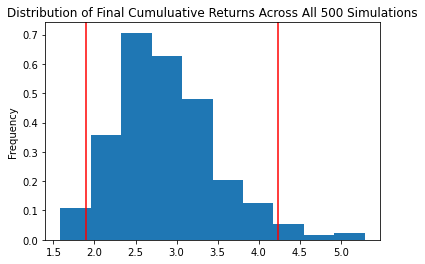

In [10]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MonteCarlo_5yrs_distribution2.png',bbox_inches='tight')

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              2.874445
std               0.614718
min               1.583831
25%               2.465180
50%               2.797896
75%               3.204300
max               5.292219
95% CI Lower      1.902421
95% CI Upper      4.232691
Name: 1260, dtype: float64


In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(summary[8]*10000,2)
ci_upper = round(summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $19024.21 and $42326.91
